<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/jds.png" style="height: 100px;" align=right> 

# JDS Capstone: Target Market Analysis

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest advertisement. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

**3. Compare your best model's revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

## Submission Guideline

Perform the following:

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Data Pre-Processing**: Make data usable for applying ML algorithms. 
    6. **Model Design**: Create several predictive models and tune the hyperparameters
    7. **Model Evaluation**: Compare the performance of the models
    8. **Bonus**: Any creative idea for improving machine learning models

The output expected at the end of this capstone is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class. 

**One zip file per group** is to be uploaded on **GDrive** by the **time** that will be given to you by the trainer, including the **jupyter notebook(s)** and the **powerpoint presentation** indicating the **names of all group members**.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

# Table of Content

- [JDS Capstone: Target Market Analysis](#JDS-Capstone:-Target-Market-Analysis)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#0.-Import-necessary-Packages)
- [1. Load the Data into Pandas Dataframe](#1.-Load-the-Data-into-Pandas-Dataframe)
- [2. Data Cleaning](#2.-Data-Cleaning)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
    - [3.1 Explore Categorical Variables](#3.2-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#4.-Feature-Enginearing)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#5.-Feature-Selection)
- [6. Data PreProcessing](#6.-Data-PreProcessing)
    - [6.1 Check the Data for Missing Values](#6.1-Check-the-Data-for-Missing-Values)
    - [6.2 Separate X (features) and y (target)](#6.2-Separate-X-(features)-and-y-(target))
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Dummy Variables](#6.4-Dummy-Variables)
    - [6.5 Feature Scaling](#6.5-Feature-Scaling)
    - [6.6 PCA on Numerical Columns only](#6.6-PCA-on-Numerical-Columns-only)
- [7. Objective 1: Machine Learning](#7.-Objective-1:-Machine-Learning)
- [8. Objective 2](#8.-Objective-2)
- [9. Objective 3](#9.-Objective-3)
- [10. Objective 4](#10.-Objective-4)

#   0. Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [387]:
# Load the data into data dataframe
data = pd.read_csv('./data.csv')

In [255]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [256]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# 2. Data Cleaning
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [257]:
data.shape

(4469, 25)

In [258]:
data.size

111725

## 2.2 What is the type of each column?

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [260]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [390]:
data.Cust_Last_Purchase = data.Cust_Last_Purchase.str.replace('$', '')
data.Pur_latest = data.Pur_latest.str.replace('$', '')
data.Pur_3_years_Avg = data.Pur_3_years_Avg.str.replace('$', '')
data.Pur_5_years_Avg = data.Pur_5_years_Avg.str.replace('$', '')
data.Pur_3_years_Avg_Indirect = data.Pur_3_years_Avg_Indirect.str.replace('$', '')
data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace('$', '')
data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace(',', '')
data.head(5)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,113663.00


In [262]:
data.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

In [263]:
CatCols=["Potential_Customer", "Status_Cust", "Status_Latest_Ad", "Gender", "Cust_Prop"]
NumCols=list(set(data.columns)-set(CatCols))

In [264]:
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [265]:
data.dtypes

Potential_Customer          category
C_ID                         float64
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad            category
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
dtype: object

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [268]:
duplicates = data.duplicated()   
data = data.drop_duplicates()

In [269]:
duplicates.sum()

0

In [270]:
data

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946.0,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,1,87939.0,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,0,88003.0,NaN,5.0,12.0,3.0,5.0,15.0,15.00,11.25,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,1,188721.0,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,1,88056.0,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,87771.0,20.0,2.0,6.0,0.0,1.0,20.0,16.50,13.33,...,47.0,6.0,6.0,17.0,A,0,33.0,F,H,83754.0
3614,0,90077.0,NaN,7.0,31.0,4.0,21.0,13.0,12.71,10.94,...,88.0,6.0,17.0,35.0,S,1,81.0,F,H,83754.0
3615,0,94040.0,NaN,7.0,13.0,6.0,8.0,3.0,12.43,10.62,...,57.0,7.0,18.0,24.0,A,1,39.0,M,U,0.0
3616,0,87871.0,NaN,1.0,11.0,1.0,7.0,20.0,20.00,16.55,...,61.0,6.0,15.0,25.0,A,1,76.0,M,H,71618.0


## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [271]:
NumCols.remove('C_ID')

In [272]:
NumCols.remove('Cust_Last_Purchase')

In [273]:
CatCols, NumCols

(['Potential_Customer',
  'Status_Cust',
  'Status_Latest_Ad',
  'Gender',
  'Cust_Prop'],
 ['Pur_latest',
  'Pur_5_years_Avg',
  'Pur_3_years_Avg_Indirect',
  'Age',
  'Cust_Ann_Income',
  'Pur_3_years_Indirect',
  'Pur_3_years_Avg',
  'Ad_Res_Ind_3_Year',
  'Pur_5_years',
  'Pur_3_years',
  'InAct_Last',
  'Ad_Res_5_Year',
  'Pur_5_years_Indirect',
  'Ad_Res_Ind_1_Year',
  'Ad_Res_Ind_5_Year',
  'InAct_First',
  'Ad_Res_3_Year',
  'Ad_Res_1_year'])

# 3. Exploratory Data Analysis (EDA)
    
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.
**If the ultimate goal is designing predictive models on the data, and we use EDA as part of the proprocessing, we are NOT allowed to do EDA on the test set.** However, if you only do EDA to get business insight from the data, you **CAN** use the whole data, if you don't use that insight for data preprocessing such as data cleaning.
    
**Example:** To impute the missing values by mean/median, we calculate the mean or the median on the Train set only and then we impute the missing values by that mean/median on both Train and Test data.

## 3.2 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


In [274]:
CatCols, NumCols

(['Potential_Customer',
  'Status_Cust',
  'Status_Latest_Ad',
  'Gender',
  'Cust_Prop'],
 ['Pur_latest',
  'Pur_5_years_Avg',
  'Pur_3_years_Avg_Indirect',
  'Age',
  'Cust_Ann_Income',
  'Pur_3_years_Indirect',
  'Pur_3_years_Avg',
  'Ad_Res_Ind_3_Year',
  'Pur_5_years',
  'Pur_3_years',
  'InAct_Last',
  'Ad_Res_5_Year',
  'Pur_5_years_Indirect',
  'Ad_Res_Ind_1_Year',
  'Ad_Res_Ind_5_Year',
  'InAct_First',
  'Ad_Res_3_Year',
  'Ad_Res_1_year'])

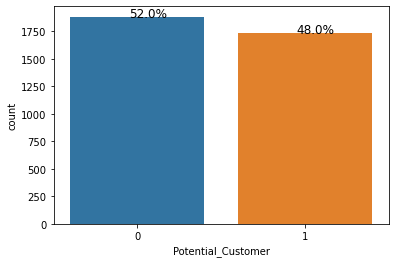

In [275]:
plot_1 = sns.countplot(data[CatCols[0]])

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot_1.annotate(percentage, (x, y), size = 12)
    plt.show()
    
without_hue(plot_1,data.Potential_Customer)

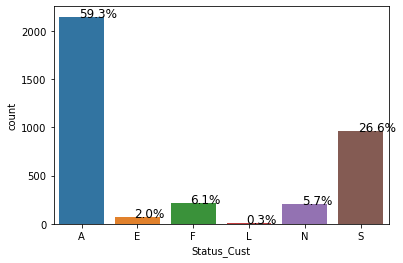

In [276]:
# A - Active buyer, F - First time buyer, S - Star buyer, L - lapse buyer, N - New buyer
plot_2 = sns.countplot(data[CatCols[1]])
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot_2.annotate(percentage, (x, y), size = 12)
    plt.show()
without_hue(plot_2,data.Status_Cust)

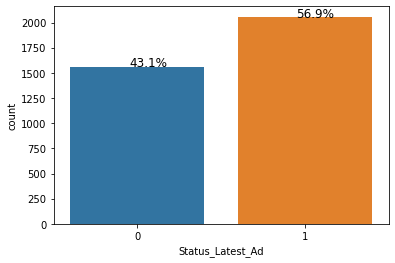

In [277]:
plot_3 = sns.countplot(data[CatCols[2]])
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot_3.annotate(percentage, (x, y), size = 12)
    plt.show()
    
without_hue(plot_3, data.Status_Latest_Ad)

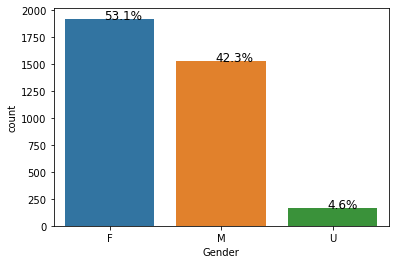

In [278]:
plot_4 = sns.countplot(data[CatCols[3]])
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot_4.annotate(percentage, (x, y), size = 12)
    plt.show()

without_hue(plot_4, data.Gender)

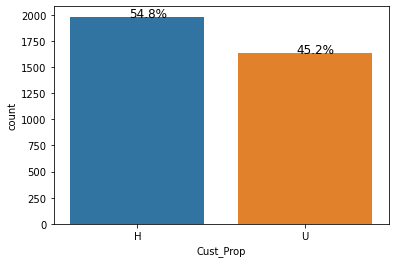

In [279]:
plot_5 = sns.countplot(data[CatCols[4]])
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot_5.annotate(percentage, (x, y), size = 12)
    plt.show()
without_hue(plot_5, data.Cust_Prop)

### 3.1.1 Insight

In [280]:
1. More than 50% active buyers 
2. Female buyers dominate 
3. House owners buying more 

SyntaxError: invalid syntax (<ipython-input-280-150faaf6be56>, line 1)

### 3.1.2 Solution

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

In [281]:
CatFes = list(set(CatCols)-set(['Potential_Customer']))
CatTar = list(set(['Potential_Customer']))
CatFes, CatTar

(['Gender', 'Cust_Prop', 'Status_Cust', 'Status_Latest_Ad'],
 ['Potential_Customer'])

### 3.2.1. Insight

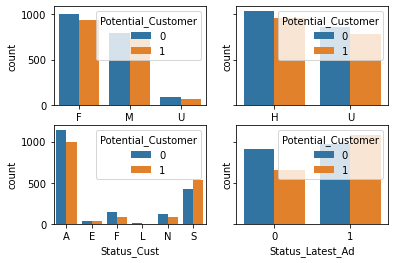

In [282]:
fig, ax = plt.subplots(2,2, sharex= False, sharey='row')
sns.countplot(data[CatFes[0]], ax=ax[0,0], hue = data.Potential_Customer)
sns.countplot(data[CatFes[1]], ax=ax[0,1], hue = data.Potential_Customer)
sns.countplot(data[CatFes[2]], ax=ax[1,0], hue = data.Potential_Customer)
sns.countplot(data[CatFes[3]], ax=ax[1,1], hue = data.Potential_Customer)
fig.show()


## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [30]:
CatFes_num = list(set(NumCols))
len(CatFes_num)

18

In [31]:
CatFes_num

['Ad_Res_Ind_3_Year',
 'Pur_5_years',
 'Pur_3_years',
 'InAct_Last',
 'Ad_Res_Ind_1_Year',
 'Ad_Res_5_Year',
 'Pur_5_years_Indirect',
 'Ad_Res_Ind_5_Year',
 'Pur_5_years_Avg',
 'Pur_3_years_Avg_Indirect',
 'Age',
 'Cust_Ann_Income',
 'InAct_First',
 'Pur_latest',
 'Pur_3_years_Avg',
 'Ad_Res_1_year',
 'Pur_3_years_Indirect',
 'Ad_Res_3_Year']

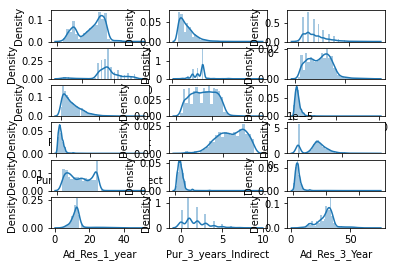

In [32]:
fig, ax = plt.subplots(6,3, sharex= False, sharey=False)
sns.distplot(data[CatFes_num[0]], ax=ax[0,0])
sns.distplot(data[CatFes_num[1]], ax=ax[0,1])
sns.distplot(data[CatFes_num[2]], ax=ax[0,2])
sns.distplot(data[CatFes_num[3]], ax=ax[1,0])
sns.distplot(data[CatFes_num[4]], ax=ax[1,1])
sns.distplot(data[CatFes_num[5]], ax=ax[1,2])
sns.distplot(data[CatFes_num[6]], ax=ax[2,0])
sns.distplot(data[CatFes_num[7]], ax=ax[2,1])
sns.distplot(data[CatFes_num[8]], ax=ax[2,2])
sns.distplot(data[CatFes_num[9]], ax=ax[3,0])
sns.distplot(data[CatFes_num[10]], ax=ax[3,1])
sns.distplot(data[CatFes_num[11]], ax=ax[3,2])
sns.distplot(data[CatFes_num[12]], ax=ax[4,0])
sns.distplot(data[CatFes_num[13]], ax=ax[4,1])
sns.distplot(data[CatFes_num[14]], ax=ax[4,2])
sns.distplot(data[CatFes_num[15]], ax=ax[5,0])
sns.distplot(data[CatFes_num[16]], ax=ax[5,1])
sns.distplot(data[CatFes_num[17]], ax=ax[5,2])

fig.show()
# 0 - 'Ad_Res_1_year'
# 1 - 'Ad_Res_1_year',
# 2 - 'Ad_Res_Ind_1_Year',
# 3 - 'InAct_Last',
# 4 - 'Ad_Res_Ind_3_Year',
# 5 - 'Pur_5_years_Indirect',
# 6 - 'Ad_Res_Ind_5_Year',
# 7 - 'Pur_5_years',
# 8 - 'Pur_3_years_Indirect',
# 9 - 'Pur_5_years_Avg',
# 10 - 'Age',

# 11 - 'Ad_Res_5_Year',
# 12 - 'Pur_3_years',
# 13 - 'Pur_3_years_Avg',
# 14 - 'Cust_Ann_Income',
# 15 - 'InAct_First',
# 16 - 'Pur_latest',
# 17 - 'Ad_Res_3_Year',
# 18 - 'Pur_3_years_Avg_Indirect'


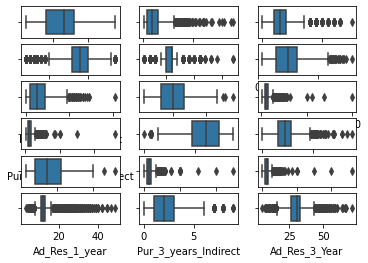

In [33]:
fig, ax = plt.subplots(6,3, sharex= False, sharey= False)
sns.boxplot(data[CatFes_num[0]], ax=ax[0,0])
sns.boxplot(data[CatFes_num[1]], ax=ax[0,1])
sns.boxplot(data[CatFes_num[2]], ax=ax[0,2])
sns.boxplot(data[CatFes_num[3]], ax=ax[1,0])
sns.boxplot(data[CatFes_num[4]], ax=ax[1,1])
sns.boxplot(data[CatFes_num[5]], ax=ax[1,2])
sns.boxplot(data[CatFes_num[6]], ax=ax[2,0])
sns.boxplot(data[CatFes_num[7]], ax=ax[2,1])
sns.boxplot(data[CatFes_num[8]], ax=ax[2,2])
sns.boxplot(data[CatFes_num[9]], ax=ax[3,0])
sns.boxplot(data[CatFes_num[10]], ax=ax[3,1])
sns.boxplot(data[CatFes_num[11]], ax=ax[3,2])
sns.boxplot(data[CatFes_num[12]], ax=ax[4,0])
sns.boxplot(data[CatFes_num[13]], ax=ax[4,1])
sns.boxplot(data[CatFes_num[14]], ax=ax[4,2])
sns.boxplot(data[CatFes_num[15]], ax=ax[5,0])
sns.boxplot(data[CatFes_num[16]], ax=ax[5,1])
sns.boxplot(data[CatFes_num[17]], ax=ax[5,2])

fig.show()


### 3.3.1 Insight

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

In [34]:
x = data[CatFes_num]
y = data[CatCols[0]]

<AxesSubplot:xlabel='Potential_Customer', ylabel='Pur_5_years_Indirect'>

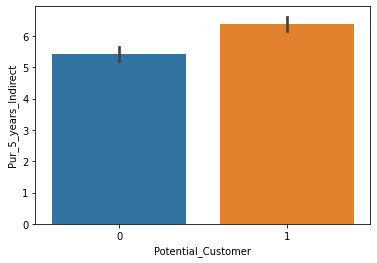

In [35]:
sns.barplot(y, x.Pur_5_years_Indirect)

<AxesSubplot:xlabel='Potential_Customer', ylabel='Ad_Res_Ind_5_Year'>

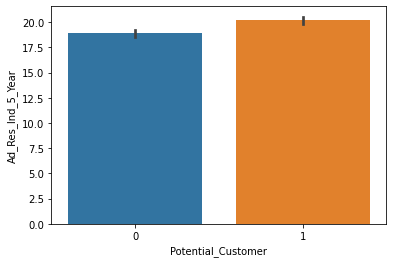

In [36]:
sns.barplot(y, x.Ad_Res_Ind_5_Year)

## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

<AxesSubplot:xlabel='Gender', ylabel='Cust_Ann_Income'>

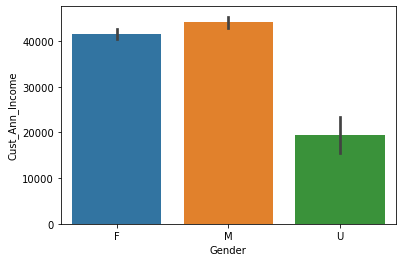

In [37]:
sns.barplot(x = data.Gender, y = data.Cust_Ann_Income)
# No significant difference in salary for men and women

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years'>

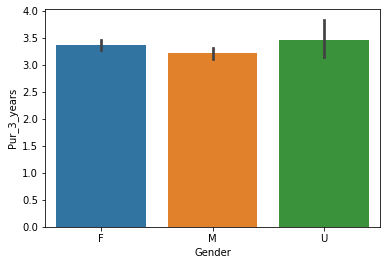

In [38]:
sns.barplot(x = data.Gender, y = data.Pur_3_years)

<AxesSubplot:xlabel='Gender', ylabel='Pur_3_years_Avg'>

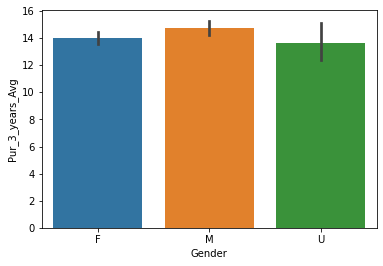

In [39]:
sns.barplot(x = data.Gender, y = data.Pur_3_years_Avg)

<AxesSubplot:xlabel='Gender'>

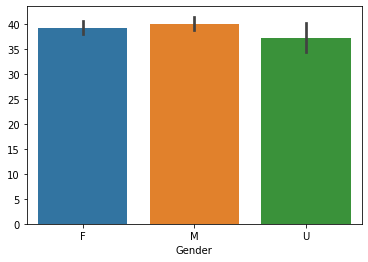

In [40]:

sns.barplot(x = data.Gender, y = data.Pur_3_years_Avg*data.Pur_3_years)

# 4. Feature Enginearing

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

In [283]:
data.insert(0, "Total_pur_3_years",data.Pur_3_years_Avg*data.Pur_3_years, True)
data.insert(0, "Total_pur_5_years",data.Pur_5_years_Avg*data.Pur_5_years, True)
data = data.loc[:, data.columns != 'C_ID']
data = data.loc[:, data.columns != 'Cust_Last_Purchase']


In [284]:
data.head()

,Total_pur_5_years,Total_pur_3_years,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,131.92,15.00,1,2.0,17.0,2.0,4.0,0.0,7.50,7.76,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,91.00,25.00,1,1.0,7.0,0.0,3.0,25.0,25.00,13.00,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,135.00,75.00,0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,136.95,20.00,1,1.0,11.0,0.0,3.0,20.0,20.00,12.45,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,57.00,12.99,1,3.0,15.0,2.0,7.0,3.0,4.33,3.80,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


In [285]:
data.insert(0, "Total_pur_3_years_Ind",data.Pur_3_years_Indirect*data.Pur_3_years_Avg_Indirect, True)

data.head()


,Total_pur_3_years_Ind,Total_pur_5_years,Total_pur_3_years,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,15.00,131.92,15.00,1,2.0,17.0,2.0,4.0,0.0,7.50,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,NaN,91.00,25.00,1,1.0,7.0,0.0,3.0,25.0,25.00,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,44.01,135.00,75.00,0,5.0,12.0,3.0,5.0,15.0,15.00,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,NaN,136.95,20.00,1,1.0,11.0,0.0,3.0,20.0,20.00,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,8.00,57.00,12.99,1,3.0,15.0,2.0,7.0,3.0,4.33,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


In [44]:
data.Total_pur_3_years_Ind = data.Total_pur_3_years_Ind.fillna(0)
data.head()

,Total_pur_3_years_Ind,Total_pur_5_years,Total_pur_3_years,Potential_Customer,Pur_5_years_Indirect,Pur_latest,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,15.00,131.92,15.00,1,4.0,0.0,14.0,110.0,32.0,48.0,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,0.00,91.00,25.00,1,3.0,25.0,18.0,75.0,13.0,35.0,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,44.01,135.00,75.00,0,5.0,15.0,19.0,57.0,14.0,35.0,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,0.00,136.95,20.00,1,3.0,20.0,5.0,113.0,17.0,38.0,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,8.00,57.00,12.99,1,7.0,3.0,17.0,118.0,13.0,28.0,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

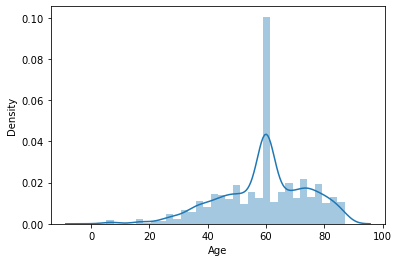

In [291]:
sns.distplot(data.Age)

In [334]:
Avg_age = data.Age.median()

In [335]:
data.Age = data.Age.fillna(Avg_age)

In [339]:
data.isnull().values.any()

True

In [338]:
data.Total_pur_3_years_Ind = data.Total_pur_3_years_Ind.fillna(0)
data.Pur_3_years_Avg = data.Pur_3_years_Avg.fillna(0)
data.Pur_3_years = data.Pur_3_years.fillna(0)
data.Pur_5_years_Avg = data.Pur_5_years_Avg.fillna(0)
data.Pur_5_years = data.Pur_5_years.fillna(0)

## 4.2 Check Correlation between Numerical Variables

# 5. Feature Selection

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

# 6. Data PreProcessing

## 6.1 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

## 6.2 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis

In [64]:
data.head()

,Total_pur_3_years_Ind,Total_pur_5_years,Total_pur_3_years,Potential_Customer,Pur_5_years_Indirect,Pur_latest,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,15.00,131.92,15.00,1,4.0,0.0,14.0,110.0,32.0,48.0,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,0.00,91.00,25.00,1,3.0,25.0,18.0,75.0,13.0,35.0,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,44.01,135.00,75.00,0,5.0,15.0,19.0,57.0,14.0,35.0,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,0.00,136.95,20.00,1,3.0,20.0,5.0,113.0,17.0,38.0,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,8.00,57.00,12.99,1,7.0,3.0,17.0,118.0,13.0,28.0,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


In [65]:
data.shape

(3618, 20)

In [174]:
X = data.drop('Potential_Customer', axis=1)
y = data.Potential_Customer
X.head(), y.head()

(   Total_pur_3_years_Ind  Total_pur_5_years  Total_pur_3_years  \
 0                  15.00             131.92              15.00   
 1                   0.00              91.00              25.00   
 2                  44.01             135.00              75.00   
 3                   0.00             136.95              20.00   
 4                   8.00              57.00              12.99   
 
    Pur_5_years_Indirect  Pur_latest  InAct_Last  InAct_First  Ad_Res_1_year  \
 0                   4.0         0.0        14.0        110.0           32.0   
 1                   3.0        25.0        18.0         75.0           13.0   
 2                   5.0        15.0        19.0         57.0           14.0   
 3                   3.0        20.0         5.0        113.0           17.0   
 4                   7.0         3.0        17.0        118.0           13.0   
 
    Ad_Res_3_Year  Ad_Res_5_Year  Ad_Res_Ind_1_Year  Ad_Res_Ind_3_Year  \
 0           48.0           73.0        

## 6.3 Split data to train/test 

Define X and y and split the data into 75/25 train/test set. Use random_state=42 and stratify=y

## 6.4 Dummy Variables
Change categorical variables with numerical variabels

In [175]:
X = pd.get_dummies(X, drop_first = True)
X

,Total_pur_3_years_Ind,Total_pur_5_years,Total_pur_3_years,Pur_5_years_Indirect,Pur_latest,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,...,Cust_Ann_Income,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
0,15.00,131.92,15.00,4.0,0.0,14.0,110.0,32.0,48.0,73.0,...,65957.0,0,0,0,0,0,0,0,0,0
1,0.00,91.00,25.00,3.0,25.0,18.0,75.0,13.0,35.0,55.0,...,0.0,0,0,0,0,0,1,1,0,1
2,44.01,135.00,75.00,5.0,15.0,19.0,57.0,14.0,35.0,53.0,...,0.0,0,0,0,0,1,1,0,0,1
3,0.00,136.95,20.00,3.0,20.0,5.0,113.0,17.0,38.0,71.0,...,76293.0,0,0,0,0,0,0,0,0,1
4,8.00,57.00,12.99,7.0,3.0,17.0,118.0,13.0,28.0,63.0,...,113663.0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,0.00,79.98,33.00,1.0,20.0,19.0,57.0,13.0,34.0,47.0,...,83754.0,0,0,0,0,0,0,0,0,0
3614,53.00,339.14,88.97,21.0,13.0,17.0,128.0,13.0,32.0,88.0,...,83754.0,0,0,0,0,1,1,0,0,0
3615,75.00,138.06,87.01,8.0,3.0,4.0,80.0,16.0,36.0,57.0,...,0.0,0,0,0,0,0,1,1,0,1
3616,20.00,182.05,20.00,7.0,20.0,24.0,93.0,11.0,31.0,61.0,...,71618.0,0,0,0,0,0,1,1,0,0


In [220]:
X.columns

Index(['Total_pur_3_years_Ind', 'Total_pur_5_years', 'Total_pur_3_years',
       'Pur_5_years_Indirect', 'Pur_latest', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Age', 'Cust_Ann_Income',
       'Status_Cust_E', 'Status_Cust_F', 'Status_Cust_L', 'Status_Cust_N',
       'Status_Cust_S', 'Status_Latest_Ad_1', 'Gender_M', 'Gender_U',
       'Cust_Prop_U'],
      dtype='object')

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=42, stratify=y)

In [177]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (2713, 24)
y_train.shape (2713,)
X_test.shape (905, 24)
y_test.shape (905,)


## 6.5 Feature Scaling

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score

In [208]:
scaler = MinMaxScaler()

scaler.fit(X_train)




MinMaxScaler()

## 6.6 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
`X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)`
2. Separate train and test data for numerical columns only
`train_PCA=X_train_sc[NewNumCols]`, `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [209]:
from sklearn.decomposition import PCA

In [210]:
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [211]:
NewNumCols = ['Total_pur_3_years_Ind', 'Total_pur_5_years', 'Total_pur_3_years',
       'Pur_5_years_Indirect', 'Pur_latest', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Age', 'Cust_Ann_Income',]
train_PCA = X_train_sc[NewNumCols]
test_PCA = X_test_sc[NewNumCols]

In [242]:
pca = PCA(n_components=5)
pca.fit(train_PCA)
PCA_train = pca.transform(train_PCA)
PCA_test = pca.transform(test_PCA)


In [243]:
PCA_train = pd.DataFrame(PCA_train)
PCA_test = pd.DataFrame(PCA_test)
PCA_train.index = X_train.index
PCA_test.index = X_test.index

In [244]:
PCA_test.isnull().values.any()

False

In [245]:
X_test.isnull().values.any()

False

In [246]:
dum_cols = ['Status_Cust_E', 'Status_Cust_F', 'Status_Cust_L', 'Status_Cust_N',
       'Status_Cust_S', 'Status_Latest_Ad_1', 'Gender_M', 'Gender_U',
       'Cust_Prop_U']
X_train_pca = pd.concat([PCA_train, X_train[dum_cols]], axis=1)
X_test_pca = pd.concat([PCA_test, X_test[dum_cols]], axis=1)


In [247]:
X_test_pca.isnull().values.any()

False

In [248]:
X_train_pca

,0,1,2,3,4,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
3151,0.498424,0.560834,-0.356568,0.025425,0.170171,0,0,0,0,1,1,0,0,1
1698,0.532669,0.427246,-0.027174,0.013738,-0.022153,0,0,0,0,1,1,0,0,0
2327,-0.110876,0.181669,0.226805,-0.082678,0.054474,0,0,0,0,0,0,1,0,0
721,-0.317138,0.172405,0.175564,0.039569,0.004751,0,0,0,0,0,1,0,0,0
811,0.343579,-0.140567,-0.086577,-0.039276,0.049319,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,0.676903,-0.201574,0.238274,0.090082,0.239506,0,0,0,0,1,1,0,0,1
2424,-0.129955,0.127961,-0.049951,-0.009276,-0.266221,0,0,0,0,0,0,0,1,1
2788,0.293739,-0.189720,-0.297960,0.139327,0.262743,0,0,0,0,1,1,1,0,0
1813,-0.046266,0.004244,-0.046465,-0.378710,-0.037250,0,0,0,0,0,0,0,0,0


In [249]:
type(X_train_pca), type(X_test_pca), type(PCA_train), type(X_train)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [250]:
X_train_pca.shape

(2713, 14)

# 7. Objective 1: Machine Learning
    
**1. Design a predictive model to determine the potential customers who will purchase if you send the advertisement .** The target variable is `Potential_Customer`. 

    **Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.


Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model.

In [251]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 20),
              'p': [1,2],
              'weights': ['uniform','distance']}


grid = GridSearchCV(KNeighborsClassifier(), 
                    param_grid, scoring='precision_macro',
                    cv=10)

grid.fit(X_train_pca, y_train)
grid.best_params_

{'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}

In [219]:
model = grid.best_estimator_
model

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [228]:
model.fit(X_train_pca,y_train)
y_pred = model.predict(X_test_pca)

In [229]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print('classification_report:\n',classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

classification_report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55       471
           1       0.50      0.47      0.48       434

    accuracy                           0.52       905
   macro avg       0.52      0.52      0.51       905
weighted avg       0.52      0.52      0.52       905



array([[266, 205],
       [232, 202]])

In [134]:
model = LogisticRegression()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('classification_report:\n',classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

classification_report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60       471
           1       0.54      0.48      0.51       434

    accuracy                           0.56       905
   macro avg       0.56      0.55      0.55       905
weighted avg       0.56      0.56      0.55       905



array([[297, 174],
       [227, 207]])

In [192]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [252]:
svc = SVC(kernel='linear')
lr = LogisticRegression(solver='saga',multi_class='auto',max_iter=550, fit_intercept=True )
knn = KNeighborsClassifier(n_neighbors=7)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_depth=80)

models=['lr', 'svc', 'knn', 'nb', 'dt']

In [253]:
for i in range(len(models)):
    eval(models[i]).fit(X_train_pca, y_train)
    y_pred_pca=eval(models[i]).predict(X_test_pca)
    print('*****'+ models[i]+' with PCA *****')
    print('**************')
    print( models[i]+' with PCA: Accuracy ',eval(models[i]).score(X_test_pca, y_test))
    print('**************')
    print(models[i]+' with PCA Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred_pca))
    print('**************')
    print(models[i]+' with PCA Classification Report:')
    print(metrics.classification_report(y_test, y_pred_pca)) 
    print('**************')
    #print(models[i]+' with PCA Confusion Matrix:')
    mat = confusion_matrix(y_test, y_pred_pca)
    #sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             #xticklabels = data.Potential_Customer, yticklabels=data.Potential_Customer)
    #plt.xlabel('true label')
    #plt.ylabel('predicted label')
    #plt.show()
    del(mat)

*****lr with PCA *****
**************
lr with PCA: Accuracy  0.5337016574585636
**************
lr with PCA Confusion Matrix:
[[281 190]
 [232 202]]
**************
lr with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       471
           1       0.52      0.47      0.49       434

    accuracy                           0.53       905
   macro avg       0.53      0.53      0.53       905
weighted avg       0.53      0.53      0.53       905

**************
*****svc with PCA *****
**************
svc with PCA: Accuracy  0.5392265193370166
**************
svc with PCA Confusion Matrix:
[[215 256]
 [161 273]]
**************
svc with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       471
           1       0.52      0.63      0.57       434

    accuracy                           0.54       905
   macro avg       0.54      0.54      0

# 8. Objective 2

**2. Calculate the value and the revenue of your model.** Fit your model on train set. Assume amonge the customers on your test set we only send advertisement to those your model predicted as Class1 and we ignore the rest. From the data you can calculate the average `Cust_Last_Purchase` for those who are in the train set and had the last purchase (`Cust_Last_Purchase`>0) . Assume sending advertisement to each customer costs 5$ and the average purchase you calculated on the train set remains the same for the test set. Calculate the value of your models to choose the best model.

    - cost = advertisement_cost * number of the predicted positive
    - lost = average_purchase * number of the predicted negative but they have been positive
    - gain = average_purchase * number of the predicted positive and they have been positive
    - value = gain - lost - cost
    - revenue = gain - cost

In [237]:
X.columns

Index(['Total_pur_3_years_Ind', 'Total_pur_5_years', 'Total_pur_3_years',
       'Pur_5_years_Indirect', 'Pur_latest', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Age', 'Cust_Ann_Income',
       'Status_Cust_E', 'Status_Cust_F', 'Status_Cust_L', 'Status_Cust_N',
       'Status_Cust_S', 'Status_Latest_Ad_1', 'Gender_M', 'Gender_U',
       'Cust_Prop_U'],
      dtype='object')

In [ ]:
[[193 278]
 [128 306]]

In [401]:
# 193 is the TP for naive bayes classifier
cost = 5*(306+278) #TP + FP
lost = avg_pur * 128
gain = avg_pur * 306
value = gain - lost - cost
revenue = gain - cost
revenue

1576.5195852534562

# 9. Objective 3
    
**3. Compare your best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.** Which solution would you choose?

    - cost = advertisement_cost * size of the test set
    - gain = sum(Cust_Last_Purchase) on test set
    - revenue = gain - cost



In [342]:
X_test.shape

(905, 24)

In [343]:
X_test_pca.shape

(905, 14)

In [350]:
X_test

,Total_pur_3_years_Ind,Total_pur_5_years,Total_pur_3_years,Pur_5_years_Indirect,Pur_latest,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,...,Cust_Ann_Income,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Gender_M,Gender_U,Cust_Prop_U
1024,33.00,86.04,58.02,6.0,11.0,16.0,115.0,11.0,25.0,43.0,...,44789.0,0,0,0,0,0,1,0,1,1
3531,20.00,69.04,45.00,4.0,15.0,18.0,56.0,13.0,33.0,44.0,...,46901.0,0,0,0,0,1,1,0,0,1
1992,35.00,71.01,59.01,5.0,10.0,17.0,41.0,12.0,31.0,33.0,...,49219.0,0,0,0,0,1,1,0,0,0
1875,36.00,72.00,36.00,4.0,21.0,16.0,68.0,14.0,32.0,52.0,...,60483.0,0,0,0,0,0,0,1,0,0
243,80.00,115.01,105.00,5.0,20.0,16.0,41.0,15.0,35.0,40.0,...,0.0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,19.00,41.00,41.00,2.0,10.0,18.0,31.0,12.0,25.0,25.0,...,38328.0,0,0,0,0,0,0,0,0,0
3413,25.00,25.00,25.00,1.0,25.0,24.0,24.0,9.0,19.0,17.0,...,28646.0,0,0,0,1,0,0,0,0,0
1407,20.00,118.95,35.00,8.0,10.0,16.0,98.0,15.0,33.0,64.0,...,0.0,0,0,0,0,0,1,0,0,1
3336,32.01,81.00,57.00,5.0,12.0,17.0,53.0,15.0,33.0,55.0,...,80946.0,0,0,0,0,0,0,1,0,0


In [404]:
cost = 905*5
gain = sum(data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'])
revenue = gain - cost
revenue

14607.25

# 10. Objective 4
    
**4. Assume the next time you want to target a group of 30,000 customers simillar to this group. And assume the purchase rate is $10%$ which means 10 out of 100 people who receive the advertisement will purchase the product. Also assume your model will have the same Precision and Recall for Class1 .** Will you send the advertisement to everyone, or you use one of the models you have already created?

    - calculate your model's revenue on this set of 30,000 customers based on the above assumptions
    - calculate the revenue of the default model: send advertisement to everyone
         - cost = advertisement_cost * size of the test set
         - gain = average_purchase * purchase_rate
         - revenue = gain - cost
    
**Hint:**
    To calculate the revenue of a model for this new set of customers with different purchase rate we need to calculate the new confusion matrix given Precision and Recall for Class1 are fixed.

In [419]:
# default model: ads to all
cost = 5*30000
gain = 3000*avg_pur
revenue = gain - cost
revenue


-105916.47465437787

In [406]:
model = ['nb']
for i in range(len(model)):
    eval(model[i]).fit(X_train_pca, y_train)
    y_pred_pca=eval(model[i]).predict(X_test_pca)
    print('*****'+ model[i]+' with PCA *****')
    print('**************')
    print( model[i]+' with PCA: Accuracy ',eval(models[i]).score(X_test_pca, y_test))
    print('**************')
    print(model[i]+' with PCA Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred_pca))
    print('**************')
    print(model[i]+' with PCA Classification Report:')
    print(metrics.classification_report(y_test, y_pred_pca)) 
    print('**************')
    #print(models[i]+' with PCA Confusion Matrix:')
    mat = confusion_matrix(y_test, y_pred_pca)
    #sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
             #xticklabels = data.Potential_Customer, yticklabels=data.Potential_Customer)
    #plt.xlabel('true label')
    #plt.ylabel('predicted label')
    #plt.show()
    del(mat)

*****nb with PCA *****
**************
nb with PCA: Accuracy  0.5337016574585636
**************
nb with PCA Confusion Matrix:
[[185 286]
 [128 306]]
**************
nb with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.39      0.47       471
           1       0.52      0.71      0.60       434

    accuracy                           0.54       905
   macro avg       0.55      0.55      0.53       905
weighted avg       0.56      0.54      0.53       905

**************


In [414]:
# new confusion matrix
TP = 3000 * 0.71
TP

2130.0

In [415]:
FN = 3000 - TP
FN

870.0

In [416]:
FP = (TP/0.52) - TP 
FP

1966.1538461538457

In [417]:
TN = 30000 - TP - FP - FN
TN

25033.846153846156

In [418]:
# revenue for model with 30000 targets
cost = 3000*5
gain = avg_pur*TP
revenue = gain - cost
revenue

16299.302995391703

In [399]:
avg_pur = data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()

avg_pur

14.694508448540706

In [ ]:
# 1. No of act class 1 = 3000 = TP + FN
# 2. Recall = TP/TP+FN, TP = 3000*Recall
# 3. Precision = TP/TP+FP 

In [394]:
data.Cust_Last_Purchase = data.Cust_Last_Purchase.fillna(0)

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        4469 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [397]:
data.Cust_Last_Purchase = data.Cust_Last_Purchase.astype('float64')

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        4469 non-null   float64
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3